In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

In [2]:
from Regressions import *

In [3]:
y_tr, X_tr, ids_tr = load_csv_data('../Data/train.csv')
y_te, X_te, ids_te = load_csv_data('../Data/test.csv')

In [4]:
y_tr[y_tr==-1] = 0
y_te[y_te==-1] = 0

# Training data preparation

## Neutral data

In [9]:
X_tr_neutral = preliminary_treatment_X(X_tr, imp_method="median")


## Logarithmic data

In [5]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

X_tr_log = preliminary_treatment_X(x_nan, imp_method="median")

## Cleaned data

In [6]:
def outlier_cleaning(data, y, features_treated = "all", m=2.5):
    if features_treated == "all":
        #features_treated = range(0,data.shape[1])
        features_treated = np.delete(np.arange(data.shape[1]),[22])
        
        
    data_clean = data.copy()
    y_clean = y.copy()
    
    for i in features_treated:
        feature = data_clean[:,i]
        outliers = abs(feature - np.nanmean(feature)) > m * np.nanstd(feature)
        data_clean = data_clean[~outliers,:]
        y_clean = y_clean[~outliers]
    return data_clean, y_clean

In [7]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan
y_clean = y_tr.copy()
x_clean, y_clean = outlier_cleaning(x_nan, y_clean, "all")

#transform nan back into -999
x_clean[np.isnan(x_clean)]=-999

X_tr_clean = preliminary_treatment_X(x_clean, imp_method="median")

/home/william/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


## Interaction data with Feature 22

In [10]:
X_tr_inter = X_tr_neutral.copy()
for i in range(4):
    for j in range(4,23):
        X_tr_inter = interactions(X_tr_inter,i,j)

# Testing different methods on training data

Testing for method logistic_regression with transf. id([])... Be patient! ;)
[<function logistic_regression at 0x7f1cf2fe3c80>, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])] [<function id at 0x7f1cf3043e18>, []]


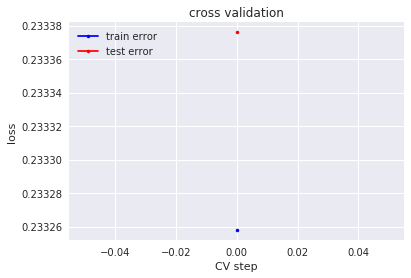

In [13]:
#set the training data to be used
tx = X_tr_log
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[logistic_regression, [w]]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

Testing for method reg_logistic_regression with transf. id([])... Be patient! ;)
[<function reg_logistic_regression at 0x7f1cf2fe3d08>, 1e-06] [<function id at 0x7f1cf3043e18>, []]


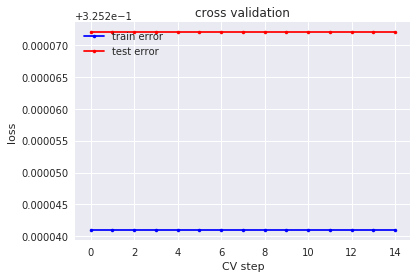

In [17]:
#set the training data to be used
tx = X_tr_log
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[reg_logistic_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [18]:
print(least_squares_GD(y_tr, tx, w))

[array([ 4.40111359e-01,  2.82508369e-01,  3.13291412e-01,  1.59346588e-01,
        7.70635572e-03, -1.08628315e-01, -1.41489095e-01,  2.19382119e-03,
        9.40126887e-03,  4.19549396e-02,  1.19166294e-03,  1.49038510e-01,
        1.01762846e-03, -1.12306540e-02,  2.75048419e-02,  5.33749219e-02,
        3.53155670e-02,  1.87772277e-01, -4.69227497e-04, -4.84770201e-04,
        4.85097211e-02, -3.86710777e-04,  1.26527522e-03,  1.88732882e-02,
        4.42525780e-04, -3.91857695e-02,  1.11267038e-02,  2.37319812e-04,
       -8.00279954e-05, -9.10410478e-03,  8.51977834e-04, -7.37792286e-04,
        1.18606957e-01]), 0.0823468722417776]


Testing for method least_squares_GD with transf. id([])... Be patient! ;)
[array([ 4.40109078e-01,  2.82508297e-01,  3.13291055e-01,  1.59342532e-01,
        7.72331413e-03, -1.08626239e-01, -1.41517435e-01,  2.20049617e-03,
        9.40181575e-03,  4.19600210e-02,  1.19452839e-03,  1.49045466e-01,
        1.01694643e-03, -1.12336867e-02,  2.75008340e-02,  5.33715910e-02,
        3.53137386e-02,  1.87771783e-01, -4.65636201e-04, -4.84960419e-04,
        4.85156310e-02, -3.87856521e-04,  1.26402986e-03,  1.88686665e-02,
        4.40751952e-04, -3.91827411e-02,  1.11274597e-02,  2.36308468e-04,
       -8.14997861e-05, -9.10450271e-03,  8.50803246e-04, -7.37671955e-04,
        1.18604162e-01])]
[<function least_squares_GD at 0x7f1cf2fe3950>, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])] [<function id at 0x7f1cf3043e18>, []]


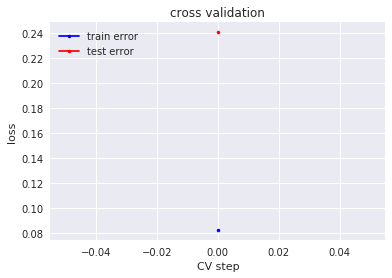

In [23]:
#set the training data to be used
tx = X_tr_log
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[least_squares_GD, [w]]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

Testing for method least_squares_SGD with transf. id([])... Be patient! ;)
[<function least_squares_SGD at 0x7f1cf2fe39d8>, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])] [<function id at 0x7f1cf3043e18>, []]


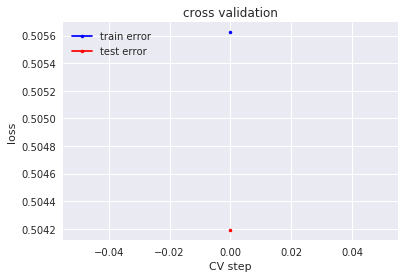

In [25]:
#set the training data to be used
tx = X_tr_log
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[least_squares_SGD, [w]]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [167]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
w

array([ 2.29868134e-01,  1.78483956e-01,  1.48665639e-01,  4.52804962e-02,
       -1.95429240e-03, -9.45588689e-02, -2.98173834e-02,  1.94658692e-02,
        2.24737702e-02,  2.64626322e-02, -1.08961440e-02,  5.36656466e-02,
       -1.59328758e-02,  1.57878401e-02, -2.20381015e-02,  6.08154222e-02,
        3.13376667e-02,  8.93976237e-02, -5.57737480e-04, -1.16214264e-03,
        1.86289920e-02, -2.49198566e-04,  1.33439120e-03, -1.34090818e-02,
        1.05328425e-03,  1.99366724e-03,  1.59580933e-02,  3.31134359e-06,
        3.09848975e-04, -1.64534472e-02,  7.98095286e-04, -5.59986315e-04,
        2.66533100e-02])

## Simple cross validation

In [58]:
cross_validation(y_tr, tx, k_fold, reg_logistic_regression, gamma = 0.0005, k_indices=None, seed=1)

TypeError: cross_validation() got an unexpected keyword argument 'gamma'

## Interaction and Logarithmic transformation

In [70]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

X_tr_log = preliminary_treatment_X(x_nan, imp_method="median")

X_tr_loginter = X_tr_log.copy()
for i in range(4):
    for j in range(4,23):
        X_tr_loginter = interactions(X_tr_loginter,i,j)

Testing for method ridge_regression with transf. id([])... Be patient! ;)
[<function ridge_regression at 0x10c35ac80>, 0.0003727593720314938] [<function id at 0x10ab26840>, []]


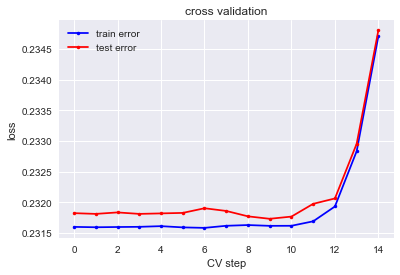

In [72]:
#set the training data to be used
tx = X_tr_loginter
y_tr = y_tr
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [73]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.231684

## Feature selection

### All lasso out 

In [168]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

## take phi and eta and sumet out
features = np.zeros(30,dtype=bool)
keepers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,21,22,23,26,29]
features[keepers] = True
## treat it
X_treated = preliminary_treatment_X(x_nan, features, imp_method="median")

X_tr_loginter_lassout = X_treated.copy()
for i in range(4):
    for j in range(4,23):
        X_tr_loginter_lassout = interactions(X_tr_loginter_lassout,i,j)

Testing for method ridge_regression with transf. id([])... Be patient! ;)
[<function ridge_regression at 0x1a55be88c8>, 0.0007196856730011514] [<function id at 0x10ab26840>, []]


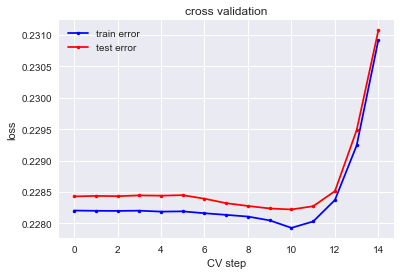

In [169]:
#set the training data to be used
tx = X_tr_loginter_lassout
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-6,-2,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [170]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.228012

### All lasso out and cleaning with changing m

In [176]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

y_clean = y_tr.copy()
x_clean, y_clean = outlier_cleaning(x_nan, y_clean, "all", m=2.5)

#transform nan back into -999
x_clean[np.isnan(x_clean)]=-999

## take phi and eta and sumet out
features = np.zeros(30,dtype=bool)
keepers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,21,22,23,26,29]
features[keepers] = True
## treat it
X_treated = preliminary_treatment_X(x_clean, features, imp_method="median")

X_tr_loginter_lassout_m = X_treated.copy()
for i in range(4):
    for j in range(4,23):
        X_tr_loginter_lassout_m = interactions(X_tr_loginter_lassout_m,i,j)

/Users/Marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


In [177]:
X_tr_loginter_lassout_m.shape

(200537, 99)

Testing for method ridge_regression with transf. id([])... Be patient! ;)
[<function ridge_regression at 0x1a55be88c8>, 1.9306977288832497e-07] [<function id at 0x10ab26840>, []]


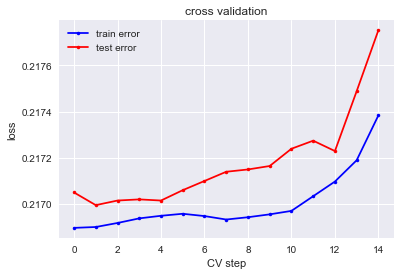

In [111]:
#set the training data to be used
tx = X_tr_loginter_lassout_m
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-7,-3,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_clean, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [112]:
func, par = method
predictor, w, loss = func(y_clean, tx, par, pred = True)
loss

0.21686771019811804

## Submission

In [81]:
def predict_labels(w,tx):
    return tx.dot(w)

In [82]:
x_nan = X_te.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

## take phi and eta and sumet out
features = np.zeros(30,dtype=bool)
keepers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,21,22,23,26,29]
features[keepers] = True
## treat it
X_treated = preliminary_treatment_X(x_nan, features, imp_method="median")

X_te_loginter_lassout = X_treated.copy()
for i in range(4):
    for j in range(4,23):
        X_te_loginter_lassout = interactions(X_te_loginter_lassout,i,j)

In [119]:
tx = X_te_loginter_lassout
y_pred = predict_labels(w,tx)
y_predict = categories(y_pred)

In [120]:
y_predict[y_predict==0]=-1
y_predict

array([-1., -1., -1., ...,  1., -1., -1.])

In [121]:
create_csv_submission(ids_te, y_predict, "../Data/test_Marie_283.csv")

## Avec polynomial, lasso out, log and interactions with the linear term

In [182]:
x_nan = X_tr.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

## take phi and eta and sumet out
features = np.zeros(30,dtype=bool)
keepers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,21,22,23,26,29]
features[keepers] = True
## treat it
X_treated = preliminary_treatment_X(x_nan, features, imp_method="median")

X_poly = build_poly(X_treated, 1)

X_tr_loginter_lassout_poly = X_poly.copy()
for i in range(4):
    for j in range(4, X_poly.shape[1], 1):
        X_tr_loginter_lassout_poly = interactions(X_tr_loginter_lassout_poly,i,j)

In [183]:
X_tr_loginter_lassout_poly.shape

(250000, 104)

Testing for method ridge_regression with transf. id([])... Be patient! ;)
[<function ridge_regression at 0x1a55be88c8>, 1.1787686347935867e-07] [<function id at 0x10ab26840>, []]


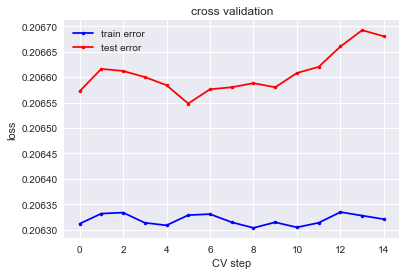

In [157]:
#set the training data to be used
tx = X_tr_loginter_lassout_poly
w = np.zeros(tx.shape[1])
# define the lambdas range
lambdas = np.logspace(-8,-5,15)
k_fold = 5


transformations = [[id,[]]]

methods = [[ridge_regression, lambdas]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=1, only_best=True)

print(method, transformation)

In [158]:
func, par = method
predictor, w, loss = func(y_tr, tx, par, pred = True)
loss

0.206396

## Submission

In [154]:
x_nan = X_te.copy()
x_nan[x_nan==-999]=np.nan

# add log transformations
x_nan[:,3] = log_plus(x_nan[:,3], 3)
x_nan[:,8] = log_plus(x_nan[:,8], 1)
x_nan[:,13] = log_plus(x_nan[:,13], 1)
x_nan[:,16] = log_plus(x_nan[:,16], 1)
x_nan[:,19] = log_plus(x_nan[:,19], 2)
x_nan[:,23] = log_plus(x_nan[:,23], 2)
x_nan[:,29] = log_plus(x_nan[:,29], 1)

# transform nan back into -999
x_nan[np.isnan(x_nan)]=-999

## take phi and eta and sumet out
features = np.zeros(30,dtype=bool)
keepers = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,19,22,23,26,29]
features[keepers] = True
## treat it
X_treated = preliminary_treatment_X(x_nan, features, imp_method="median")

X_poly = build_poly(X_treated, 4)

X_te_loginter_lassout_poly = X_poly.copy()
for i in range(4):
    for j in range(4,X_poly.shape[1],4):
        X_te_loginter_lassout_poly = interactions(X_te_loginter_lassout_poly,i,j)

In [159]:
tx = X_te_loginter_lassout_poly
y_pred = predict_labels(w,tx)
y_predict = categories(y_pred)

In [160]:
y_predict[y_predict==0]=-1
y_predict

array([-1., -1., -1., ...,  1., -1., -1.])

In [161]:
create_csv_submission(ids_te, y_predict, "../Data/test_Marie_285.csv")